In [1]:
pip install pandas scikit-learn transformers torch nltk


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 30.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

/tmp/ipython-input-13-1856531491.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='Set2')


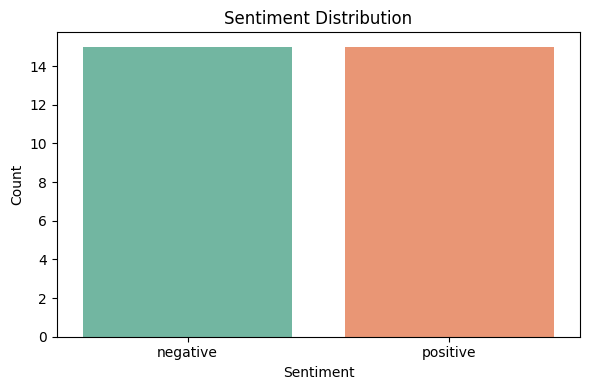

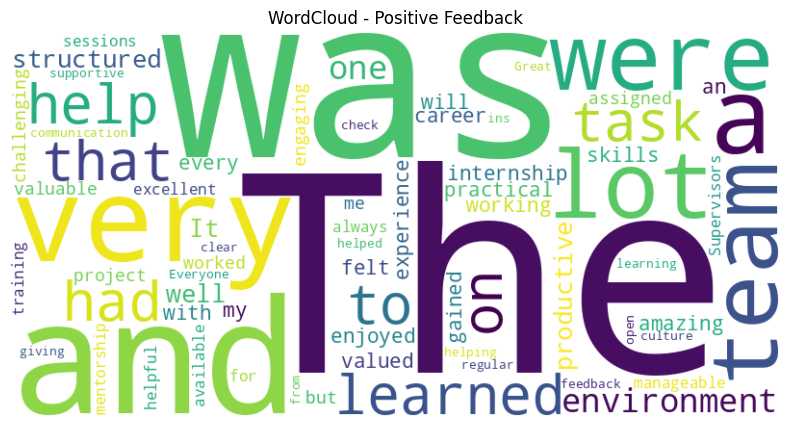

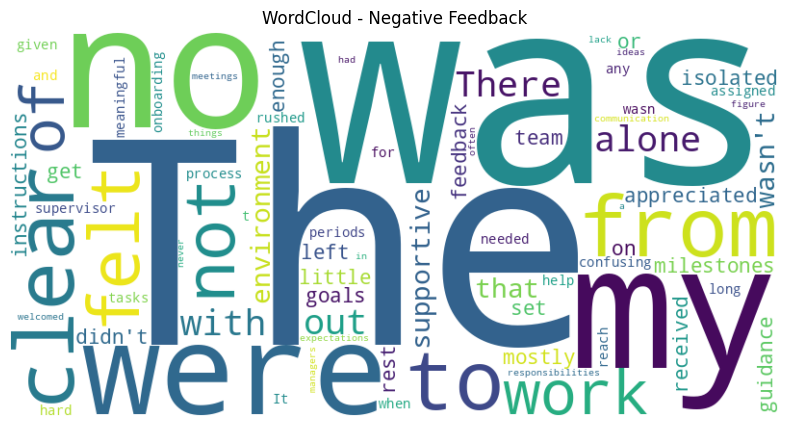


Classification Report:
              precision    recall  f1-score   support

    Negative       0.60      1.00      0.75         3
    Positive       1.00      0.33      0.50         3

    accuracy                           0.67         6
   macro avg       0.80      0.67      0.62         6
weighted avg       0.80      0.67      0.62         6



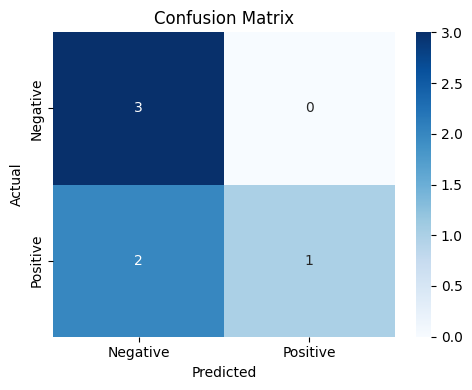

/tmp/ipython-input-13-1856531491.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=labels, palette=color)


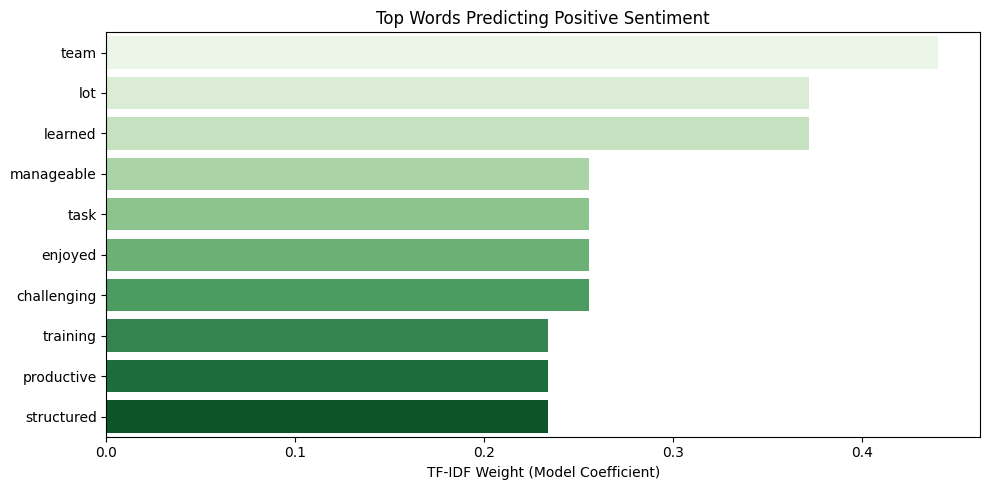

/tmp/ipython-input-13-1856531491.py:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=values, y=labels, palette=color)


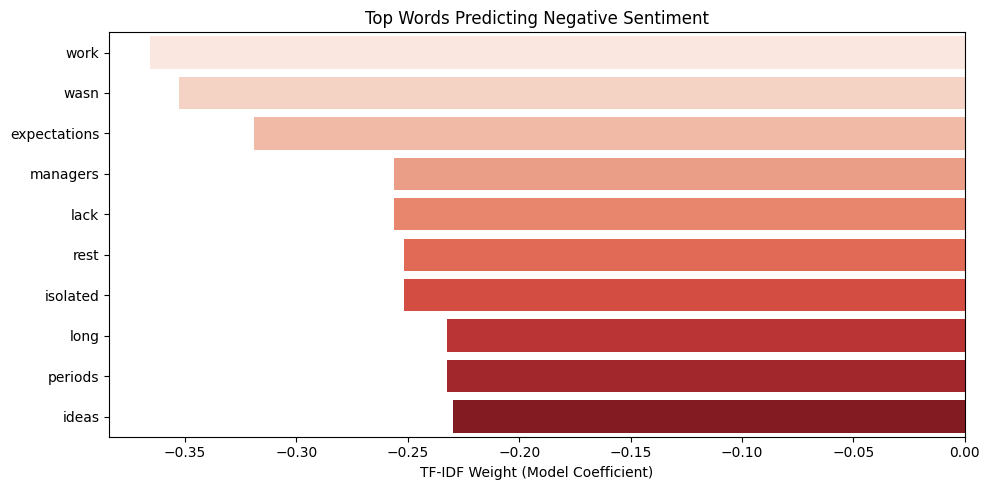

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud

# Step 1: Load Dataset
df = pd.read_csv("/content/intern_feedback_balanced.csv")

# Step 2: Visualize Sentiment Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment', palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Step 3: WordClouds
def generate_wordcloud(text, title):
    wc = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(" ".join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(df[df['sentiment']=='positive']['feedback'], "WordCloud - Positive Feedback")
generate_wordcloud(df[df['sentiment']=='negative']['feedback'], "WordCloud - Negative Feedback")

# Step 4: Encode sentiment
df['label'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Step 5: Stratified Split to balance classes in both sets
X_train, X_test, y_train, y_test = train_test_split(
    df['feedback'], df['label'], test_size=0.2, stratify=df['label'], random_state=42)

# Step 6: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 7: Train Model with Class Balancing
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

# Step 8: Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# Step 10: Most Influential Words
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

top_pos_indices = coefficients.argsort()[::-1][:10]
top_neg_indices = coefficients.argsort()[:10]

top_pos_words = [(feature_names[i], coefficients[i]) for i in top_pos_indices]
top_neg_words = [(feature_names[i], coefficients[i]) for i in top_neg_indices]

# Plot Function
def plot_words(words, title, color):
    labels, values = zip(*words)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=values, y=labels, palette=color)
    plt.title(title)
    plt.xlabel("TF-IDF Weight (Model Coefficient)")
    plt.tight_layout()
    plt.show()

plot_words(top_pos_words, "Top Words Predicting Positive Sentiment", "Greens")
plot_words(top_neg_words, "Top Words Predicting Negative Sentiment", "Reds")


**LDA topic modeling**

In [11]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from gensim import corpora, models

# download stopwords
nltk.download('punkt')
nltk.download('stopwords')

# Step 1: Load dataset and filter negative feedback
df = pd.read_csv("/content/intern_feedback_balanced.csv")
df = df[df['sentiment'] == 'negative']  # Only negative feedback

# Step 2: Preprocess and tokenize
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]

df['tokens'] = df['feedback'].apply(preprocess)

# Step 3: Topic Modeling using LDA
dictionary = corpora.Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10, random_state=42)

# Step 4: Show topics
print("\n🔍 Top complaint themes (topics):")
for i, topic in lda_model.print_topics():
    print(f"Topic {i+1}: {topic}")



🔍 Top complaint themes (topics):
Topic 1: 0.046*"work" + 0.045*"alone" + 0.045*"little" + 0.045*"figure" + 0.045*"received" + 0.045*"often" + 0.045*"things" + 0.045*"feedback" + 0.045*"responsibilities" + 0.045*"given"
Topic 2: 0.036*"felt" + 0.036*"get" + 0.036*"supervisor" + 0.036*"enough" + 0.036*"guidance" + 0.036*"process" + 0.036*"confusing" + 0.036*"onboarding" + 0.036*"rest" + 0.036*"isolated"
Topic 3: 0.066*"clear" + 0.037*"instructions" + 0.037*"hard" + 0.037*"left" + 0.037*"assigned" + 0.037*"mostly" + 0.037*"long" + 0.037*"periods" + 0.037*"needed" + 0.037*"help"


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Transformer-based Model (BERT)**

In [20]:
pip install -U transformers datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [14]:
pip install transformers datasets


In [18]:
!pip install -U transformers


In [12]:
from transformers import pipeline

# Load pretrained sentiment pipeline
sentiment_analyzer = pipeline("sentiment-analysis")

# Example usage
sample_feedback = [
    "The team was very supportive and helped me learn a lot.",
    "I felt ignored and didn't get enough guidance."
]

results = sentiment_analyzer(sample_feedback)

for fb, res in zip(sample_feedback, results):
    print(f"\nFeedback: {fb}\nSentiment: {res['label']} (Score: {res['score']:.2f})")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cpu



Feedback: The team was very supportive and helped me learn a lot.
Sentiment: POSITIVE (Score: 1.00)

Feedback: I felt ignored and didn't get enough guidance.
Sentiment: NEGATIVE (Score: 1.00)


Map:   0%|          | 0/24 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: maryamijaz-12j (maryamijaz-12j-ghulam-ishaq-khan-institute-of-engineerin) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
10,0.589600



Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         3
    Positive       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



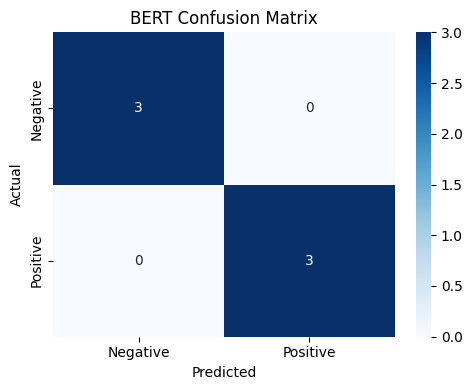

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load dataset
df = pd.read_csv("/content/intern_feedback_balanced.csv")
df['label'] = df['sentiment'].map({'negative': 0, 'positive': 1})

# Step 2: Train-test split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['feedback'].tolist(), df['label'].tolist(), test_size=0.2, stratify=df['label'], random_state=42)

# Step 3: Tokenization
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def tokenize(batch):
    return tokenizer(batch["text"], padding="max_length", truncation=True, max_length=128)

train_df = pd.DataFrame({"text": train_texts, "label": train_labels})
test_df = pd.DataFrame({"text": test_texts, "label": test_labels})

train_dataset = Dataset.from_pandas(train_df)
test_dataset = Dataset.from_pandas(test_df)

train_dataset = train_dataset.map(tokenize, batched=True)
test_dataset = test_dataset.map(tokenize, batched=True)

train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# Step 4: Load pre-trained BERT for binary classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Step 5: Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    do_train=True,
    do_eval=True,
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    logging_dir="./logs",
    logging_steps=10,
    save_strategy="no"  # avoids trying to save checkpoints
)

# Step 6: Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Step 7: Train the model
trainer.train()

# Step 8: Predict and evaluate
predictions = trainer.predict(test_dataset)
y_pred = predictions.predictions.argmax(axis=1)

print("\nClassification Report:")
print(classification_report(test_labels, y_pred, target_names=["Negative", "Positive"]))

# Step 9: Confusion Matrix
cm = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("BERT Confusion Matrix")
plt.tight_layout()
plt.show()


In [5]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; 